In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from python.room_init import rooms
from python.data_init import load_dataset, get_data
from python.room_init import cluster_1, cluster_2, cluster_3
from python.utils import RMSE
from python.plot import multi_plot, interactive_plot

Load the dataset as (x, y) pairs

In [ ]:
X, y, y0, datetime = load_dataset(get_data())

In [ ]:
cluster = cluster_2 #just modify this line to use different clusters
room_names = cluster.room_names()
room_names = [str(room_name) for room_name in room_names]

In [ ]:
def get_data_for_rooms(room_names):
    init_temperature = {}
    radiator_switch = {}

    for room_name in room_names:
        init_temperature[room_name] = y0[room_name]
        radiator_switch[room_name] = X["switch_" + room_name]

    return init_temperature, radiator_switch

In [ ]:
init_temperature, radiator_switch = get_data_for_rooms(cluster.room_names())

In [ ]:
temperature_predictions = cluster.simulate(init_temperature, X["T_m_water"], X["T_m_ext"], radiator_switch, X["Irradiation"], X["Occupancy"])

In [ ]:
for room_name in room_names:
    print("{}: {}".format(room_name, RMSE(temperature_predictions[room_name], y[room_name])))

Room2: 0.7046213532287819
Room3: 1.84726730071353


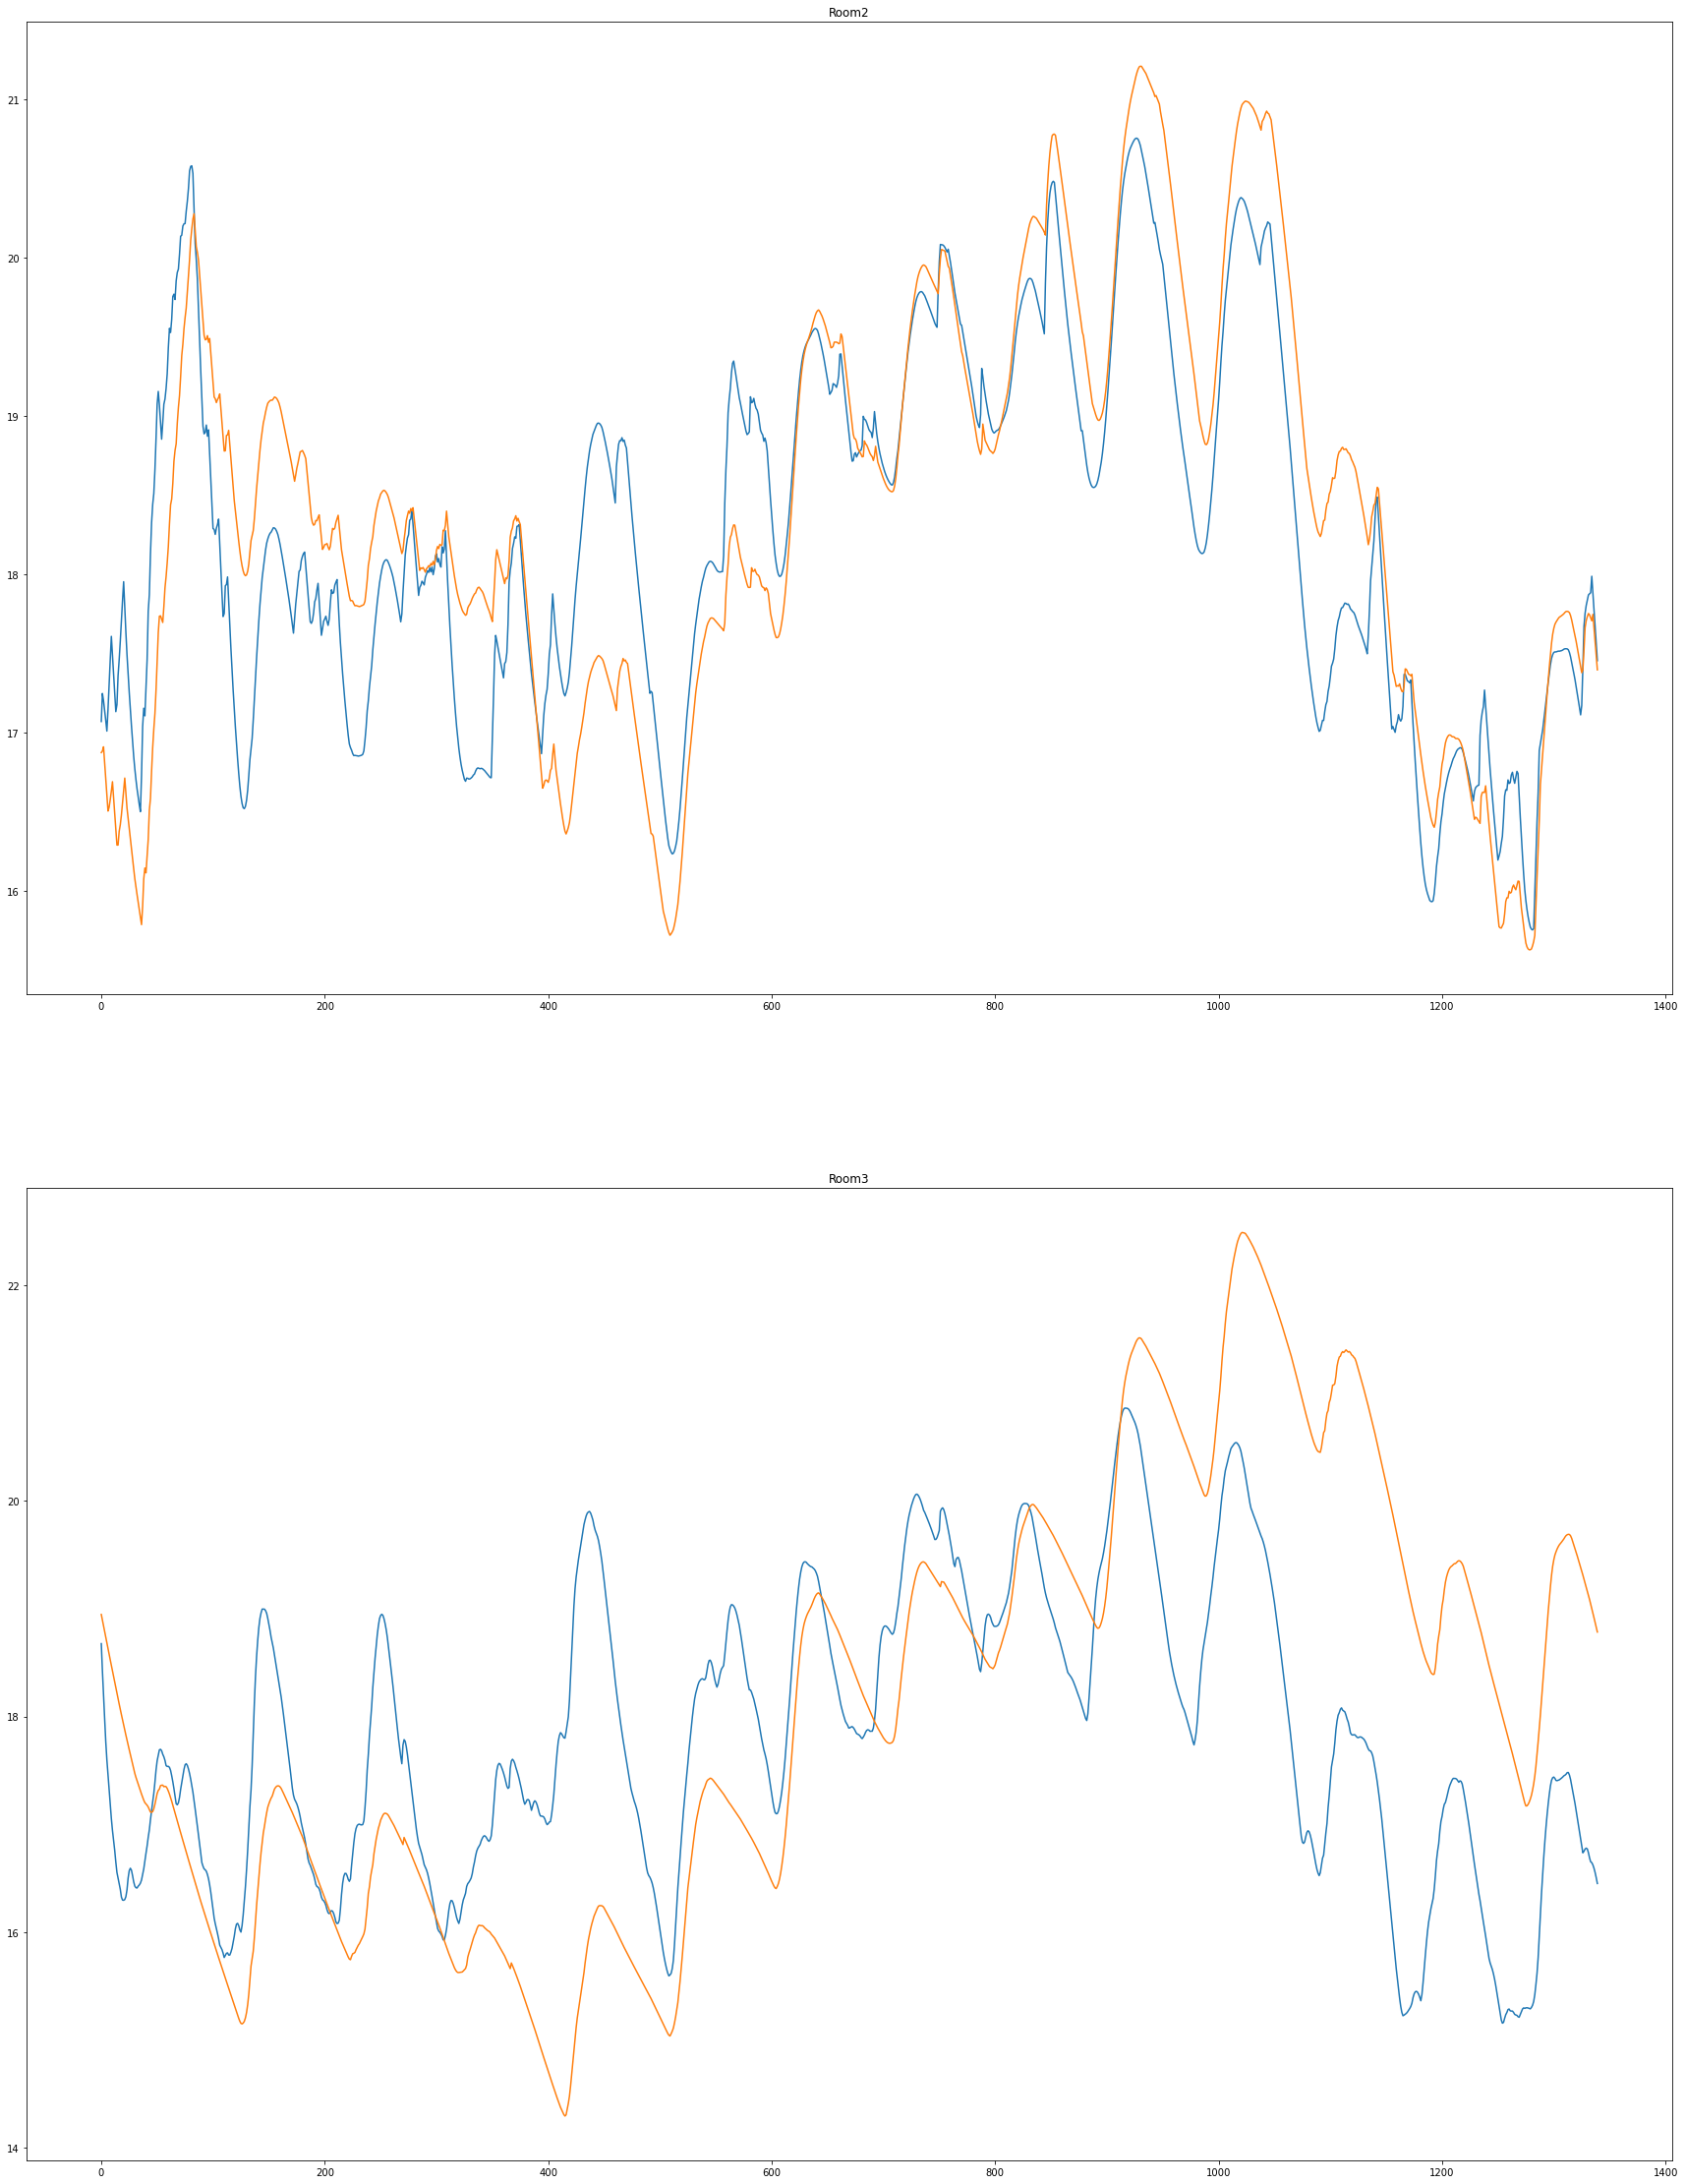

In [ ]:
df = [pd.DataFrame({"real_temperature": y[room_name], "predicted_temperature": temperature_predictions[room_name]}) for room_name in room_names]
plt.plot(df[0])

In [ ]:
room_name = room_names[0]

In [ ]:
interactive_plot(rooms, room_name, y[room_name], temperature_predictions[room_name], datetime, X["T_set_" + room_name])